### Graduate Admission
##### Predicting admission from important parameters

### Task 1: Predict Likelihood of Admission

### 1. importing the required packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew

import torch
from torch.autograd import Variable
from sklearn.preprocessing import StandardScaler # scaling data
import torch.nn as nn # linear model
from sklearn.model_selection import train_test_split #train - test dataset split

### 2. Loading the data

In [2]:
data = pd.read_csv('../datasets/Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### 3. Feature Engineering

In [3]:
data.drop(['Serial No.'], axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


### 4. Dataset Shuffle

In [5]:
data = data.sample(frac=1)

### 5. Observe Normalization

In [6]:
features = data.columns.values
skew_list = []

for feature in features:
    skew_list.append(skew(data[feature]))

print(skew_list)

[-0.06265736277921057, 0.0570011301304988, 0.17061738124467354, -0.27472598460215286, -0.10658984195285046, -0.06574282101215266, -0.1908632223506027, -0.3521212864803812]


### 6. Log Transformations

In [7]:
features = data.columns.values
for feature in features:
    data[feature] = np.log1p(data[feature])


In [8]:
features = data.columns.values
skew_list = []

for feature in features:
    skew_list.append(skew(data[feature]))
    
skew_list #now features looks at skewness

[-0.1323989793506454,
 -0.06264921130528621,
 -0.42069305757674424,
 -0.7946298233337568,
 -0.5678597610588472,
 -0.2122087939940735,
 -0.19086322235060324,
 -0.5463930843367933]

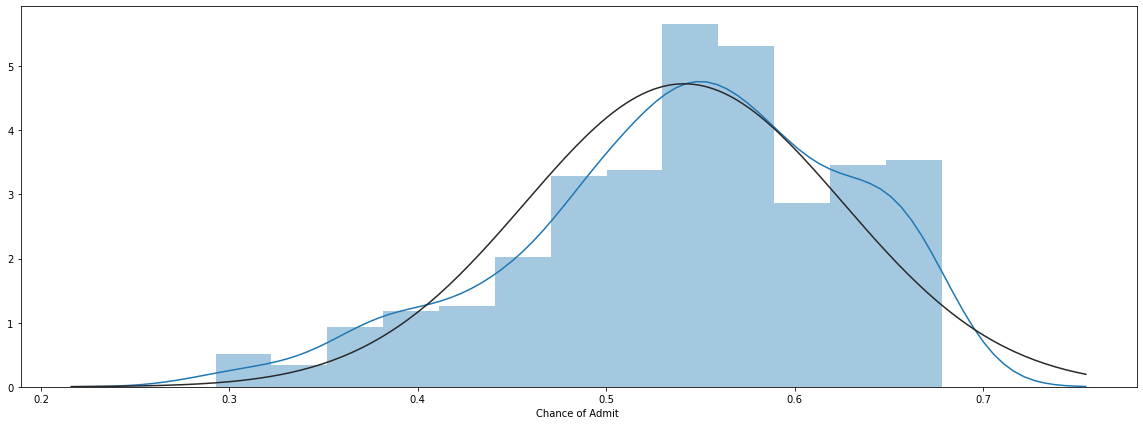

In [9]:
f, ax = plt.subplots(figsize=(20,7))
sns.distplot(data['Chance of Admit '],fit=norm)

### 7. One Hot Encoding

In [10]:
# data = pd.get_dummies(data,drop_first=True)
# data.head()

### 8. Split Dataset

In [11]:
y = data['Chance of Admit ']
x = data.drop(['Chance of Admit '],axis=1)

In [12]:
# Create train and test dataset
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### 9. Scaling

In [13]:
sc_x = StandardScaler()
# x_train_scaled = sc_x.fit_transform(x_train)
# x_test_scaled = sc_x.transform(x_test)
x_train_scaled = sc_x.fit_transform(x)

In [14]:
sc_y = StandardScaler()
# y_train_scaled = sc_y.fit_transform(pd.DataFrame(y_train))
# y_test_scaled = sc_y.transform(pd.DataFrame(y_test))
y_train_scaled = sc_x.fit_transform(pd.DataFrame(y))

In [15]:
x_train_scaled = np.array(x_train_scaled, dtype=np.float32)
y_train_scaled = np.array(y_train_scaled, dtype=np.float32)

In [16]:
# convert inputs and targets to tensor
inputs = torch.from_numpy(x_train_scaled)
targets = torch.from_numpy(y_train_scaled)

### 10. Linear Regression 

In [17]:
# create class
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, target_dim):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_dim, target_dim)
    
    def forward(self, x):
        return self.linear(x)

In [18]:
input_dim = np.size(x_train_scaled,1)
target_dim = np.size(y_train_scaled,1)
input_dim, target_dim

(7, 1)

In [19]:
#define model
model = LinearRegression(input_dim, target_dim)

In [20]:
# MSE
mse = nn.MSELoss()

In [21]:
# Optimization ( find parameters that minimizes the error)
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

In [22]:
# train model
loss_list = []
epochs = 1000

for epoch in range(epochs):
    
    # optimization
    optimizer.zero_grad()
    
    # make predictons
    predictions = model(inputs)
    
    # calculate loss
    loss = mse(predictions, targets)
    
    # backward propagation
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss)
    
    # print loss
    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.data))

epoch 0, loss 2.561753034591675
epoch 50, loss 0.24478484690189362
epoch 100, loss 0.23021318018436432
epoch 150, loss 0.22308756411075592
epoch 200, loss 0.21935230493545532
epoch 250, loss 0.2173559069633484
epoch 300, loss 0.21627874672412872
epoch 350, loss 0.21569417417049408
epoch 400, loss 0.21537578105926514
epoch 450, loss 0.21520189940929413
epoch 500, loss 0.21510683000087738
epoch 550, loss 0.2150547057390213
epoch 600, loss 0.2150261104106903
epoch 650, loss 0.21501041948795319
epoch 700, loss 0.21500179171562195
epoch 750, loss 0.21499711275100708
epoch 800, loss 0.21499447524547577
epoch 850, loss 0.21499304473400116
epoch 900, loss 0.2149922251701355
epoch 950, loss 0.21499182283878326


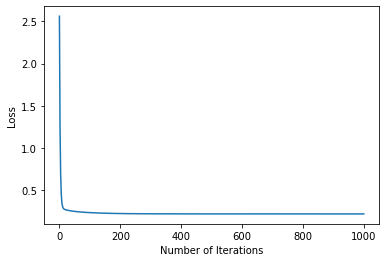

In [23]:
# plot loss per iteration 
plt.plot(range(epochs),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

### 11. Predictions

In [24]:
input_x_test = torch.from_numpy(x_train_scaled)
predicted = model(input_x_test.float()).data.numpy()

In [25]:
predicted[0:10], y_train_scaled[0:10]

(array([[-0.10081105],
        [-0.8439163 ],
        [ 0.64752996],
        [-2.2321017 ],
        [-1.8761933 ],
        [ 0.9608301 ],
        [ 0.58866227],
        [-1.1802948 ],
        [ 0.4522596 ],
        [ 0.3814671 ]], dtype=float32),
 array([[ 0.14856364],
        [-0.48037308],
        [ 0.48405892],
        [-2.258104  ],
        [-2.9448004 ],
        [ 1.1278148 ],
        [ 0.8103107 ],
        [-0.62479186],
        [ 0.41771594],
        [ 0.41771594]], dtype=float32))